## RDFを作成

In [1]:
!pip install rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 9.4 MB/s eta 0:00:00


In [2]:
!pip install pydotplus
!pip install graphviz

In [3]:
#日本語フォント（今回は使用しないが使う場合はインストール）
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (5,526 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [6]:
from rdflib import Graph, Literal, RDF, URIRef, Namespace, XSD

In [7]:
LIT = Namespace("http://example.org/lit/")

In [28]:

# 空のグラフ作成
g = Graph()
g.bind("lit", LIT)

# リソースの作成
author = LIT["Akutagawa_Ryunosuke"]
book = LIT["Rashomon"]
character = LIT["Servant"]
country = LIT["Japan"]
genre = LIT["ShortStory"]

# プロパティの定義（RDF的にはプロパティもURIなのでリソースと同じ扱い）
hasAuthor = LIT["hasAuthor"]
hasCharacter = LIT["hasCharacter"]
writtenIn = LIT["writtenIn"]
hasGenre = LIT["hasGenre"]
bornIn = LIT["bornIn"]

# トリプルの追加

# 作家
g.add((author, RDF.type, LIT.Author))
g.add((author, bornIn, country))

# 作品
g.add((book, RDF.type, LIT.Work))
g.add((book, hasAuthor, author))
g.add((book, hasCharacter, character))
g.add((book, hasGenre, genre))

# 登場人物
g.add((character, RDF.type, LIT.Character))


<Graph identifier=Nb3d2edc14c5b410baacdfeccc90e0052 (<class 'rdflib.graph.Graph'>)>

In [26]:
#Turtle形式で出力
print(g.serialize(format="turtle")) #turtle, nt, xmlなど

@prefix lit: <http://example.org/lit/> .

lit:Rashomon a lit:Work ;
    lit:hasAuthor lit:Akutagawa_Ryunosuke ;
    lit:hasCharacter lit:Servant ;
    lit:hasGenre lit:ShortStory .

lit:Akutagawa_Ryunosuke a lit:Author ;
    lit:bornIn lit:Japan .

lit:Servant a lit:Character .




In [21]:
g.serialize(destination="book.ttl", format="turtle") #turtle, nt, xmlなど

<Graph identifier=Na0d31c2df77f4a2db9312ef7633cadcf (<class 'rdflib.graph.Graph'>)>

In [22]:
#先程作成したttlファイルを読み込む
load_g = Graph()
load_g.parse("book.ttl", format='turtle')
print(load_g.serialize(format="turtle")) #turtleを標準出力

@prefix lit: <http://example.org/lit/> .

lit:Rashomon a lit:Work ;
    lit:hasAuthor lit:Akutagawa_Ryunosuke ;
    lit:hasCharacter lit:Servant ;
    lit:hasGenre lit:ShortStory .

lit:Akutagawa_Ryunosuke a lit:Author ;
    lit:bornIn lit:Japan .

lit:Servant a lit:Character .




## RDFの可視化

In [23]:
#必要ライブラリのインポート
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

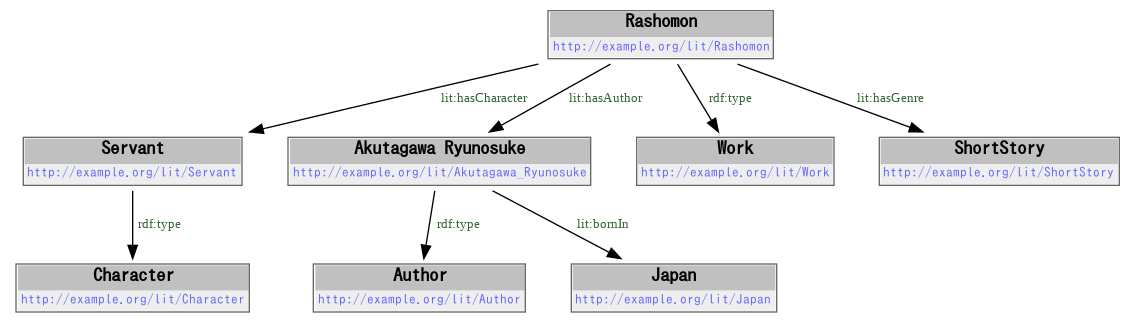

In [29]:
#先程作成したttlファイルを読み込む
load_g = Graph()
load_g.parse("book.ttl", format='turtle')

stream = io.StringIO()
rdf2dot(load_g, stream, opts = {display}) #RDFをDOT言語形式に変換
dg = pydotplus.graph_from_dot_data(stream.getvalue()) #pydotplusのオブジェクトに変換
png = dg.create_png()
display(Image(png))